<a href="https://colab.research.google.com/github/KSR-16/Programmatic-Data-Wrangling/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                       <u> TMDB Movies (Programmatic Data Wrangling) </u>

In [ ]:
#Importing libaries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the csv file and transforming it into the DataFrame

dataset = "https://raw.githubusercontent.com/KSR-16/Programmatic-Data-Wrangling/main/TMDB_movies.csv"
df = pd.read_csv(dataset)

In [ ]:
# First step was to look at how many rows and columns it has

df.shape

(4803, 20)

In [ ]:
# Looking at what data types the columns used

df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [ ]:
# Looking at the datatypes with a count of Non Nulls and seeing what stands out

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
# First look at 5 rows of the DataFrame to see how the data presented itself

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.43758,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20000,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08262,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90000,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.37679,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30000,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60000,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.92699,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10000,2124


In [ ]:
# Using descriptive analysis on the numerical columns to get an idea of how the data varies

df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.00000,4803.00000,4803.00000,4803.00000,4801.00000,4803.00000,4803.00000
mean,29045039.87529,57165.48428,21.49230,82260638.65168,106.87586,6.09217,690.21799
std,40722391.25855,88694.61403,31.81665,162857100.94283,22.61193,1.19461,1234.58589
min,0.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,790000.00000,9014.50000,4.66807,0.00000,94.00000,5.60000,54.00000
50%,15000000.00000,14629.00000,12.92159,19170001.00000,103.00000,6.20000,235.00000
75%,40000000.00000,58610.50000,28.31350,92917187.00000,118.00000,6.80000,737.00000
max,380000000.00000,459488.00000,875.58131,2787965087.00000,338.00000,10.00000,13752.00000


**Checking for nulls**

In [ ]:
# Gaining an easier look of the number of nulls in each column

df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Looking for unique values and options to create a category for the data. orginal_language has 37 so can use this to categorise.

In [ ]:
df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [ ]:
# Breakdown on the different types of languages used

df.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# Changing the data type of original_language from object to category in the DataFrame

df['original_language'] = df.original_language.astype('category')

In [ ]:
# Confirmation that it has changed

df['original_language'].unique()

['en', 'ja', 'fr', 'zh', 'es', ..., 'fa', 'no', 'sl', 'ps', 'el']
Length: 37
Categories (37, object): ['af', 'ar', 'cn', 'cs', ..., 'tr', 'vi', 'xx', 'zh']

**Extracting Data from columns**

In [ ]:
# Importing the ast module to access 5 columns easier

import ast

In [ ]:
#1

def extract_genres(x):
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id'] - Outside quotation marks removed
    Genres = [] ## Empty list to store the genres

    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary

    ''' Return the Genres'''
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [ ]:
# Confirmation that the new column has been added as orginal number was 20 and now 21

df.shape[1]

21

In [ ]:
#2

def extract_keywords(x):
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Keywords = [] ## Empty list to store the genres

    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Keywords.append(item['name']) ## Grab the 'name' key for each dictionary

    ''' Return the Genres'''
    return Keywords

## Apply the function to genres
df['extracted_keywords'] = df['keywords'].apply(extract_keywords)

In [ ]:
df.shape[1]

22

In [ ]:
#3

def extract_production_companies(x):
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Production_companies = [] ## Empty list to store the genres

    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Production_companies.append(item['name']) ## Grab the 'name' key for each dictionary

    ''' Return the Genres'''
    return Production_companies

## Apply the function to genres
df['extracted_production_companies'] = df['production_companies'].apply(extract_production_companies)

In [ ]:
df.shape[1]

23

In [ ]:
#4

def extract_production_countries(x):
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Production_countries = [] ## Empty list to store the genres

    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Production_countries.append(item['name']) ## Grab the 'name' key for each dictionary

    ''' Return the Genres'''
    return Production_countries

## Apply the function to genres
df['extracted_production_countries'] = df['production_countries'].apply(extract_production_countries)

In [ ]:
df.shape[1]

24

In [ ]:
#5

def extract_spoken_languages(x):
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Spoken_languages = [] ## Empty list to store the genres

    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Spoken_languages.append(item['name']) ## Grab the 'name' key for each dictionary

    ''' Return the Genres'''
    return Spoken_languages

## Apply the function to genres
df['extracted_spoken_languages'] = df['spoken_languages'].apply(extract_spoken_languages)

In [ ]:
df.shape[1]

25

In [ ]:
# Looking at updated DF with new columns added at the end

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.43758,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.20000,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08262,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90000,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English]
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.37679,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.30000,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.60000,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[English]
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.92699,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.10000,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[English]


In [ ]:
# A closer look on the original language and whether there was a
# greater collection of international films that didn't use English as the main language

df.groupby('original_language')[['id']].count().sort_values(by = 'id', ascending= False)

,id
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


### A more detailed look at the rows with null values in order
### to evaluate whether they should be removed or filled in with a placeholder depending on how crucial the column is.
### If this action wasn't taken then making a judgement call to leave it in the DF

In [ ]:
# Number of Films that didn't have a release date

df[df['release_date'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.00000,[],...,Released,NaN,America Is Still the Place,0.00000,0,[],[],[],[],[]


In [ ]:
#Number of films that didn't have any runtime associated with it

df[df['runtime'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.73865,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.30000,12,[Drama],"[pope, biography]",[Taodue Film],[Italy],[Español]
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.05063,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,Released,NaN,"To Be Frank, Sinatra at 100",0.00000,0,[Documentary],"[music, actors, legendary perfomer, classic ho...",[Eyeline Entertainment],[United Kingdom],[]


In [ ]:
# Number of films that didn't have an overview

df[df['overview'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.73865,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.30000,12,[Drama],"[pope, biography]",[Taodue Film],[Italy],[Español]
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.05063,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,Released,NaN,"To Be Frank, Sinatra at 100",0.00000,0,[Documentary],"[music, actors, legendary perfomer, classic ho...",[Eyeline Entertainment],[United Kingdom],[]
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.79570,[],...,Released,NaN,Food Chains,7.40000,8,[Documentary],[],[],[],[English]


In [ ]:
# Majority of rows didn't have a website

df['homepage'].isna().sum()

3091

In [ ]:
# Using the fill null method to input a placeholder to replace nulls

df["homepage"].fillna("No website", inplace = True)

In [ ]:
# Confirmation that it has taken effect

df['homepage'].isna().sum()

0

In [ ]:
# 844 films didn't have a tagline

df[df['tagline'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.92562,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,Released,NaN,Superman Returns,5.40000,1400,"[Adventure, Fantasy, Action, Science Fiction]","[saving the world, dc comics, invulnerability,...","[DC Comics, Legendary Pictures, Warner Bros., ...",[United States of America],"[English, Français, Deutsch]"
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.startrekmovie.com/,188927,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,65.35291,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Released,NaN,Star Trek Beyond,6.60000,2568,"[Action, Adventure, Science Fiction]","[sequel, stranded, hatred, space opera]","[Paramount Pictures, Bad Robot, Perfect Storm ...",[United States of America],[English]
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://disney.go.com/disneypictures/up/,14160,"[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,Up,Carl Fredricksen spent his entire life dreamin...,92.20196,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]",...,Released,NaN,Up,7.70000,6870,"[Animation, Comedy, Family, Adventure]","[age difference, central and south america, ba...",[Pixar Animation Studios],[United States of America],[English]
78,175000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",http://movies.disney.com/the-jungle-book-2016,278927,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Jungle Book,After a threat from the tiger Shere Khan force...,94.19932,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,NaN,The Jungle Book,6.70000,2892,"[Family, Adventure, Drama, Fantasy]","[based on novel, snake, wolf, elephant, tiger,...","[Walt Disney Pictures, Walt Disney Studios Mot...","[United Kingdom, United States of America]",[English]
128,150000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",http://www.angelsanddemons.com/,13448,"[{""id"": 588, ""name"": ""rome""}, {""id"": 716, ""nam...",en,Angels & Demons,Harvard symbologist Robert Langdon investigate...,67.44764,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,NaN,Angels & Demons,6.50000,2129,"[Thriller, Mystery]","[rome, vatican, based on novel, symbolism, chr...","[Columbia Pictures, Imagine Entertainment, Pan...","[Italy, United States of America]","[English, Italiano, Latin, Français, Deutsch, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",No website,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.19378,"[{""name"": ""Jafar Panahi Film Productions"", ""id...",...,Released,NaN,The Circle,6.60000,17,"[Drama, Foreign]",[],[Jafar Panahi Film Productions],[Iran],[فارسی]
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",No website,286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.16651,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...",...,Released,NaN,Sanctuary: Quite a Conundrum,0.00000,0,"[Thriller, Horror, Comedy]",[],"[Gold Lion Films, T-Street Productions]",[United States of America],[English]
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",No website,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.02217,[],...,Released,NaN,Cavite,7.500

In [ ]:
# Using a placeholder to replace null and doesn't get confused as an actual tagline. Used the popular NA(Not Available)

df["tagline"].fillna("NA", inplace = True)

In [ ]:
# Confirmation that it has taken effect

df['tagline'].isna().sum()

0

In [ ]:
# There was an overlap with films missing data from these columns
# It wasn't a material amount so removed from DF permanently

df.dropna(
    axis = 0,
    how = 'any',
    subset = ['release_date', 'runtime', 'overview'],
    inplace = True )

In [ ]:
# Confirmation that the DF contains no nulls

df.isnull().sum()

budget                            0
genres                            0
homepage                          0
id                                0
keywords                          0
original_language                 0
original_title                    0
overview                          0
popularity                        0
production_companies              0
production_countries              0
release_date                      0
revenue                           0
runtime                           0
spoken_languages                  0
status                            0
tagline                           0
title                             0
vote_average                      0
vote_count                        0
extracted_genres                  0
extracted_keywords                0
extracted_production_companies    0
extracted_production_countries    0
extracted_spoken_languages        0
dtype: int64

# Checking runtime of films. Viewing films with 0 minutes runtime and dropping them. 34 films dropped

In [ ]:
df.loc[df.runtime == 0, :]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
1011,0,"[{""id"": 27, ""name"": ""Horror""}]",No website,53953,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.71676,[],...,Released,NA,The Tooth Fairy,4.30000,13,[Horror],"[gore, slasher, single mother, tooth fairy, wo...",[],[],"[English, Polski]"
3112,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",No website,41894,[],en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.39734,[],...,Released,No one changes the world alone.,Blood Done Sign My Name,6.00000,5,"[Drama, Crime]",[],[],[],[]
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.40703,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]",...,Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.00000,0,"[Comedy, Drama]",[],[Phillybrook Films],[United States of America],[English]
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",No website,158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.92351,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...",...,Released,NA,How to Fall in Love,5.20000,20,"[Comedy, Romance, TV Movie]",[],"[Annuit Coeptis Entertainment Inc., Annuit Coe...",[United States of America],[English]
3953,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",No website,281230,"[{""id"": 187056, ""name"": ""woman director""}]",en,Fort McCoy,Unable to serve in World War II because of a h...,0.38450,[],...,Released,NA,Fort McCoy,6.30000,2,"[War, Drama, History]",[woman director],[],[],[]
3992,0,[],No website,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.29698,[],...,Released,NA,Sardaarji,9.50000,2,[],[],[],[India],[]
4068,0,[],No website,371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.02780,[],...,Released,NA,Sharkskin,0.00000,0,[],[],[],[],[]
4118,0,[],No website,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.00119,[],...,Released,NA,Hum To Mohabbat Karega,0.00000,0,[],[],[],[],[]
4205,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.imdb.com/title/tt1289419/,66468,[],en,N-Secure,N-Secure is a no holds-barred thrilling drama ...,0.13456,[],...,Released,NA,N-Secure,4.30000,4,"[Drama, Crime, Thriller]",[],[],[],[]
4210,0,"[{""id"": 10749, ""name"": ""Romance""}]",No website,74084,[],hi,दिल जो भी कहे,"During the British rule in India, several Indi...",0.12270,"[{""name"": ""Entertainment One Pvt. Ltd."", ""id"":...",...,Released,NA,Dil Jo Bhi Kahey...,0.00000,0,[Romance],[],[Entertainment One Pvt. Ltd.],[India],"[English, हिन्दी]"


In [ ]:
no_runtime = df[(df['runtime'] == 0)].index
df.drop(no_runtime, inplace=True)

## *END OF CLEANING AND QUALITY CONTROL*

# <u> Exploratory Data Analysis </u>

### Contents:

* 1st Visualisation
* 1st Keypoint
* 2nd Keypoint
* 2nd Visualisation
* 3rd Visualisation
* 1st Movie
* 2nd Movie

In [ ]:
df.corr(numeric_only= True)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.00000,-0.08066,0.50358,0.73018,0.26859,0.08467,0.59197
id,-0.08066,1.00000,0.04246,-0.04367,-0.10112,-0.24860,0.00453
popularity,0.50358,0.04246,1.00000,0.64384,0.22166,0.27543,0.77751
revenue,0.73018,-0.04367,0.64384,1.00000,0.25562,0.19763,0.78101
runtime,0.26859,-0.10112,0.22166,0.25562,1.00000,0.33765,0.27653
vote_average,0.08467,-0.24860,0.27543,0.19763,0.33765,1.00000,0.31830
vote_count,0.59197,0.00453,0.77751,0.78101,0.27653,0.31830,1.00000


# 1) Visualisation

## Correlation Heatmap

* Budget relationship with Revenue, Popularity and Vote count
* Budget and vote average non existent
* Slight correlation with the vote average and runtime. Runtime similar with budget

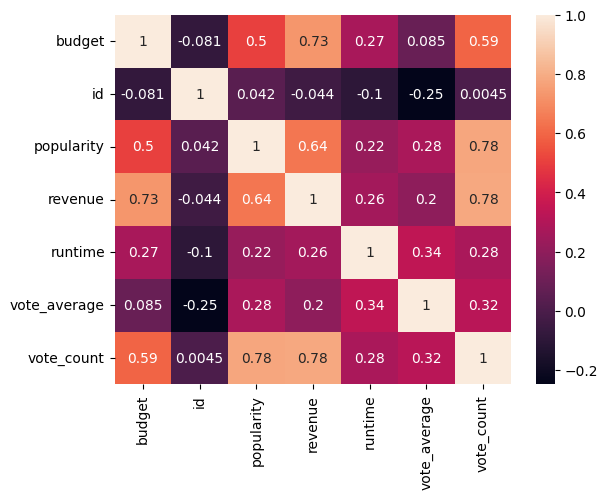

In [ ]:
sns.heatmap(df.corr(numeric_only= True), annot=True)
plt.show()

In [ ]:
##Removing scientific number view to enable easier reading of figures

pd.options.display.float_format = '{:.5f}'.format

In [ ]:
## Using revenue column to see the effect on the DF

df.revenue.describe()

count         4765.00000
mean      82916108.00336
std      163339138.78863
min              0.00000
25%              0.00000
50%       19598588.00000
75%       93772522.00000
max     2787965087.00000
Name: revenue, dtype: float64

# 1) Keypoints

There are 858 films that have NO budget and didn't earn any revenue. Strange and an outlier as expected data in these rows.
This is very likely an error in the metadata or provided with the wrong database.
I recommend investigating how and why this happened and what can be done to avoid this issue in the future.




In [ ]:
## There was 1390 films that didn't earn any revenue

df.loc[df.revenue < 1, :]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",No website,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.41853,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...",...,Released,Love is longer than life.,The Lovers,4.80000,34,"[Action, Adventure, Science Fiction, Romance]",[],"[Corsan, Bliss Media, Limelight International ...","[Australia, Belgium, India]",[English]
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.21457,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,Released,When the moon is full the legend comes to life,The Wolfman,5.50000,549,"[Drama, Horror, Thriller]","[father son relationship, victorian england, r...","[Universal Pictures, Stuber Productions, Relat...",[United States of America],[English]
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",No website,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.25113,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,Released,Don't mess with the hat.,The Cat in the Hat,4.90000,366,"[Comedy, Fantasy, Family]","[cat, brother sister relationship, boredom, ch...","[Imagine Entertainment, DreamWorks SKG, Univer...",[United States of America],[English]
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",No website,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.81559,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,Released,Who's next?,Son of the Mask,3.60000,338,"[Fantasy, Comedy, Family, Adventure]","[baby, mask, viking]","[New Line Cinema, Pathé Distribution]","[Germany, United States of America]",[English]
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",No website,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.83612,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,Released,The coast is toast,Volcano,5.20000,376,"[Science Fiction, Action, Drama, Thriller]","[subway, lava, volcano, volcanologist, los ang...",[Twentieth Century Fox Film Corporation],[United States of America],"[Deutsch, Español, English]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",No website,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.02217,[],...,Released,NA,Cavite,7.50000,2,"[Foreign, Thriller]",[],[],[],[]
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",No website,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.64255,[],...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.90000,5,"[Comedy, Romance]",[],[],[],[]
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.44448,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,Released,NA,"Signed, Sealed, Delivered",7.00000,6,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Front Street Pictures, Muse Entertainment Ent...",[United States of America],[English]
4801,0,[],http://shanghaic

In [ ]:
#858 Films that didn't have a budget and didn't earn any revenue

df.loc[
    (df.revenue < 1 ) & (df.budget < 1)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",No website,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.25113,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,Released,Don't mess with the hat.,The Cat in the Hat,4.90000,366,"[Comedy, Fantasy, Family]","[cat, brother sister relationship, boredom, ch...","[Imagine Entertainment, DreamWorks SKG, Univer...",[United States of America],[English]
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",http://www.arthurchristmas.com/,51052,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1991, ""...",en,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...",19.83683,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,Ever wonder how 2 Billion presents get deliver...,Arthur Christmas,6.70000,333,"[Drama, Animation, Family, Comedy]","[holiday, santa claus, duringcreditsstinger, w...","[Columbia Pictures, Aardman Animations, Sony P...",[United States of America],[English]
453,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",No website,12096,"[{""id"": 642, ""name"": ""robbery""}, {""id"": 5340, ...",en,The Pink Panther,When the coach of the France soccer team is ki...,25.45053,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,Pardon His French.,The Pink Panther,5.60000,550,"[Action, Comedy, Crime, Mystery, Family]","[robbery, investigation, inspector, killer, cl...","[Columbia Pictures, International Production C...",[United States of America],[English]
463,0,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 18, ...",No website,161795,"[{""id"": 9673, ""name"": ""love""}, {""id"": 14638, ""...",en,Déjà Vu,L.A. shop owner Dana and Englishman Sean meet ...,0.60564,"[{""name"": ""Rainbow Film Company, The"", ""id"": 2...",...,Released,Your future is set...,Déjà Vu,8.00000,1,"[Romance, Drama]","[love, american, pin, stranger, ruby]","[Rainbow Film Company, The, Revere Entertainme...",[United States of America],[English]
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",No website,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.30006,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...",...,Released,NA,Evolution,6.40000,47,"[Mystery, Drama, Horror]","[nurse, sea, beach, boy, pregnant, blood, woma...","[Ex Nihilo, Canal+, Les films du Worso, Noodle...","[Belgium, France, Spain]",[Français]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",No website,124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.91812,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...",...,Released,Sometimes you've got to break the rules,Bang,6.00000,1,[Drama],"[gang, audition, police fake, homeless, actress]","[Asylum Films, FM Entertainment, Eagle Eye Fil...",[United States of America],[English]
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",No website,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.02217,[],...,Released,NA,Cavite,7.50000,2,"[Foreign, Thriller]",[],[],[],[]
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.44448,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,Released,NA,"S

# 2) Keypoint

Films that didn't perform as well as expected due having a budget significantly larger than the mean.
Performance was measured in terms of critical reception by vote average.
Noticed Superhero films were a standout in terms of this criteria as they didn't meet expectations.

In [ ]:
# Using conditions that looked at films that had lower than average vote with a large sample size
# Set the budget greater than the mean by £20mil

keypoint = df.loc[(df.vote_average < 6 ) & (df.vote_count > 1000) & (df.budget  > 50000000 )]

## Noticed that Superhero films fit this criteria from the initial viewing

In [ ]:
keypoint['original_title'].values

array(['Spider-Man 3', 'Batman v Superman: Dawn of Justice',
       'Superman Returns', 'The Lone Ranger', 'The Golden Compass',
       'Battleship', 'Transformers: Age of Extinction',
       'Oz: The Great and Powerful', 'Cars 2', 'Green Lantern',
       'Terminator Salvation', 'Jack the Giant Slayer',
       'Indiana Jones and the Kingdom of the Crystal Skull', '2012',
       'Jupiter Ascending', 'The Legend of Tarzan', 'Wild Wild West',
       'The Mummy: Tomb of the Dragon Emperor', 'Suicide Squad',
       'Evan Almighty', 'G.I. Joe: The Rise of Cobra',
       'Snow White and the Huntsman', '47 Ronin',
       'Independence Day: Resurgence',
       'Terminator 3: Rise of the Machines', "The Sorcerer's Apprentice",
       'Terminator Genisys',
       'Night at the Museum: Battle of the Smithsonian',
       'Wrath of the Titans', 'Dark Shadows', 'Bee Movie',
       'The Last Airbender', 'Die Another Day', 'Ghostbusters',
       'Exodus: Gods and Kings', 'Gods of Egypt', 'Hulk',
      

In [ ]:
## Used the keywords column to islate these films as it doesn't have its own genre

superhero =  keypoint[keypoint["keywords"].str.contains('superhero')].head(14)

In [ ]:
## Ability to look at the films in this table

superhero['title'].unique()

array(['Spider-Man 3', 'Batman v Superman: Dawn of Justice',
       'Superman Returns', 'Green Lantern', 'Suicide Squad', 'Hulk',
       'Batman & Robin', 'Fantastic 4: Rise of the Silver Surfer',
       'Teenage Mutant Ninja Turtles', 'Fantastic Four',
       'The Green Hornet', 'Batman Forever', 'Blade: Trinity',
       'Ghost Rider: Spirit of Vengeance'], dtype=object)

# 2) Visualisation

## Distribution plot

* Enabled to see a broader view of the count of votes depending on the score given
* Saw outliers in the data with 50 films with 0 score and 3 films with a perfect 10
* Expected a greater number of reviews with a score of 8


In [ ]:
## 2) Table of the average reviews distribution. able to see 50 films with 0 score.

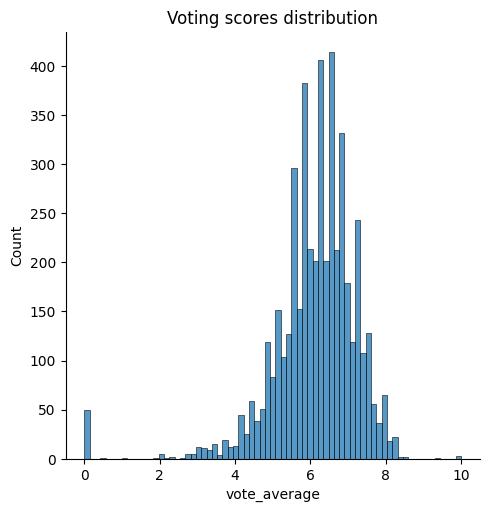

In [ ]:
## Visualise the distribution of data by a distribution plot – or histogram

sns.displot(df['vote_average'],
            height = 5)  ## altered height so could see everything without scrolling
plt.title('Voting scores distribution')
plt.show()

In [ ]:
# Noticed the outlier of films that had a vote score average of 0

df.loc[df.vote_average == 0, :]

# These films didn't have any votes made which explains this outlier

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",No website,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.12674,"[{""name"": ""Capitol Films"", ""id"": 826}]",...,Released,NA,Black Water Transit,0.00000,0,"[Drama, Crime]",[],[Capitol Films],[United States of America],[English]
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",No website,447027,[],en,Running Forever,After being estranged since her mother's death...,0.02876,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",...,Released,NA,Running Forever,0.00000,0,[Family],[],[New Kingdom Pictures],[United States of America],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",No website,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.04235,[],...,Released,NA,The Secret,0.00000,0,[Drama],[miniseries],[],[],[]
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.61814,"[{""name"": ""Representational Pictures"", ""id"": 8...",...,Released,Climate change for good.,Time to Choose,0.00000,0,[Documentary],"[climate change, documentary]",[Representational Pictures],[United States of America],[English]
3960,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",https://www.facebook.com/pages/The-Deported/46...,170480,[],en,The Deported,An Italian-American actor is deported to Mexic...,0.19485,[],...,Released,NA,The Deported,0.00000,0,"[Comedy, Family]",[],[],[],[English]
3967,3,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",No website,79587,[],en,Four Single Fathers,A comedy/drama about four Italian single fathe...,0.00826,"[{""name"": ""Indiana Production Company"", ""id"": ...",...,Released,Comedy,Four Single Fathers,0.00000,0,"[Drama, Comedy]",[],[Indiana Production Company],"[United States of America, Italy]","[Italiano, English]"
4051,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",No website,433715,"[{""id"": 10060, ""name"": ""christian film""}, {""id...",en,8 Days,"After sneaking to a party with her friends, 16...",0.01529,"[{""name"": ""After Eden Pictures"", ""id"": 85248}]",...,Released,She never knew it could happen to her...,8 Days,0.00000,0,"[Thriller, Drama]","[christian film, sex trafficking]",[After Eden Pictures],[United States of America],[English]
4065,2100000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://miamericamovie.net/,364083,"[{""id"": 40865, ""name"": ""new york state""}, {""id...",en,Mi America,A hate-crime has been committed in a the small...,0.03901,"[{""name"": ""Industrial House Films"", ""id"": 65589}]",...,Released,NA,Mi America,0.00000,0,"[Drama, Crime]","[new york state, hate crime]",[Industrial House Films],[United States of America],"[Español, English]"
4186,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 35, ""n...",No website,386826,"[{""id"": 3880, ""name"": ""snuff""}]",en,A Beginner's Guide to Snuff,"Two brothers, desperate to break into the worl...",0.06013,[],...,Released,NA,A Beginner's Guide to Snuff,0.00000,0,"[Thriller, Comedy, Horror]",[snuff],[],[],[English]
4266,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",http://houseattheendofthedrive.com/,280381,"[{""id"": 156580, ""name"": ""ghost story""}]",en,House at the End of the Drive,When David King purchases a house in the hills...,0.43049,"[{""name"": ""Allure Entertainment"", ""id"": 26679}]",...,Released,It's where they died.,House at the End of the Drive,0.00000,0,"[Thriller, Horror]",[ghost story],[Allure Entertainment],[United States 

In [ ]:
# There was a small outlier of films with a perfect score

df.loc[df.vote_average == 10, :]

# A closer look shows that the vote count was 1 or 2 which explains the slight outlier

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",No website,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.35650,[],...,Released,NA,Stiff Upper Lips,10.00000,1,[Comedy],"[italy, victorian england, young woman]",[],"[United Kingdom, India]",[English]
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",No website,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.37666,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.00000,1,"[Comedy, Drama, Family]","[small town, texas]","[HSX Films, Chase Productions]",[United States of America],[English]
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",No website,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.09410,[],...,Released,"A story about second, second chances",Me You and Five Bucks,10.00000,2,"[Romance, Comedy, Drama]",[],[],[],[]


# 3) Visualisation

## Bar chart with Bins

* Number of films were released in 2000s
* Suprised that 2010s weren't higher
* Classic films are classed as before 1990s and not represented in database

In [ ]:
# Created a new DF by using .copy() to create Bins seperated by decades

Decade = df.copy()

In [ ]:
# Used Pandas to grab the year of the films as it was an object and changed into an integer as a seperate column

Decade['release_date'] = pd.to_datetime(df['release_date'])
Decade['YEAR'] = Decade['release_date'].dt.year

In [ ]:
Decade

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages,YEAR
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.43758,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.20000,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]",2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08262,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90000,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[English],2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.37679,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.30000,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Français, English, Español, Italiano, Deutsch]",2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.60000,9106,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[English],2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.92699,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.10000,2124,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[English],2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",No website,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.26979,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"He didn't come looking for trouble, but troubl...",El Mariachi,6.60000,238,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",[Columbia Pictures],"[Mexico, United States of America]",[Español],1992
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",No website,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.64255,[],...,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.90000,5,"[Comedy, Romance]",[],[]

In [ ]:
# Dropping columns that weren't required in the Decade DF by using slicing and concatenation
columns_to_drop = list(Decade.columns[1:6]) + list(Decade.columns[7:12]) + list(Decade.columns[13:25])
Decade.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
Decade

,budget,original_title,revenue,YEAR
0,237000000,Avatar,2787965087,2009
1,300000000,Pirates of the Caribbean: At World's End,961000000,2007
2,245000000,Spectre,880674609,2015
3,250000000,The Dark Knight Rises,1084939099,2012
4,260000000,John Carter,284139100,2012
...,...,...,...,...
4798,220000,El Mariachi,2040920,1992
4799,9000,Newlyweds,0,2011
4800,0,"Signed, Sealed, Delivered",0,2013
4801,0,Shanghai Calling,0,2012


In [ ]:
# Creating the parameters from the Bins. Range of 99 years so was able to separate by 10 to view Decade performance

period_length = 10
start_year = 1916
end_year = 2017
Decade = Decade[(Decade['YEAR'] >= 1940) & (Decade['YEAR'] <= 2019)]

<ipython-input-198-7a645a4f3be3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Decade['group_years'] = Decade_copy['group_years']


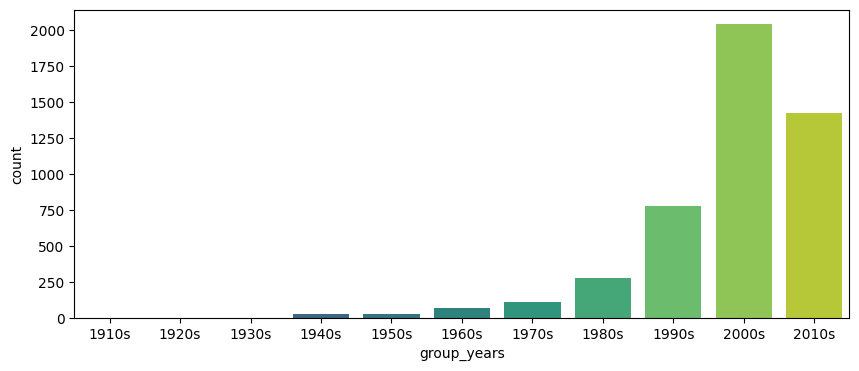

In [ ]:
def group_dec(x):
    if x < 1920:
        return '1910s'
    elif x < 1930:
        return '1920s'
    elif x < 1940:
        return '1930s'
    elif x < 1950:
        return '1940s'
    elif x < 1960:
        return '1950s'
    elif x < 1970:
        return '1960s'
    elif x < 1980:
        return '1970s'
    elif x < 1990:
        return '1980s'
    elif x < 2000:
        return '1990s'
    elif x < 2010:
        return '2000s'
    else:
        return '2010s'

Decade['group_years'] = Decade.loc[:, ('YEAR')].apply(group_dec)


plt.figure(figsize = (10,4))

sns.countplot(data = Decade,
              x = 'group_years',
              palette = 'viridis',
              order = ['1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s', '2000s', '2010s']) # Ordered chronologically

plt.show()


# 1) Movie

## Interstellar

Used the .loc function to find the most popular film that was critically acclaimed with a high vote average and large sample size

In [ ]:
# 8 was classed as an excellent reviewed film as the average was 6,
# Wanted a large sample size with the reviews to make sure the score is valid
# Popularity had a large range with majority of the films having a value of under 30.
# Kept increasing this condition until the output was only 1 film

df.loc[(df.vote_average > 8 ) & (df.vote_count > 1000) & (df.popularity > 200)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.24778,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.10000,10867,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa...","[Paramount Pictures, Legendary Pictures, Warne...","[Canada, United States of America, United King...",[English]




# 2) Movie

## Dragonball Evolution

### Unanimously viewed as the worst film ever made especially considering their budget


In [ ]:
# Wanted to find the film that was rated as bad (< 3) by viewers
# with the sample size to validate this opinion
# The last condition was making sure the film was slightly popular as it would have a large budget

df.loc[(df.vote_average < 3 ) & (df.vote_count > 100) & (df.popularity > 5)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages
1652,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",No website,14164,"[{""id"": 3436, ""name"": ""karate""}, {""id"": 9715, ...",en,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,21.67773,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,The legend comes to life.,Dragonball Evolution,2.90000,462,"[Action, Adventure, Fantasy, Science Fiction, ...","[karate, superhero, revenge, dragon, duringcre...","[Ingenious Film Partners, Twentieth Century Fo...",[United States of America],"[English, 日本語, हिन्दी]"
